In [16]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

### Lecture des données 

In [2]:
list_img = []
labels = []

directory = '../../new_data_norm2/'
for name in os.listdir(directory + 'yes'):
    img = Image.open(directory + 'yes/'+ name)
    img = img.resize((240, 240))
    img = np.asarray(img)
    list_img.append(img.flatten())
    labels.append(1)

In [3]:
for name in os.listdir(directory + 'no'):
    img = Image.open(directory + 'no/'+ name)
    img = img.resize((240, 240))
    img = np.asarray(img)
    list_img.append(img.flatten())
    labels.append(0)

In [5]:
from sklearn.manifold import TSNE

### TSNE

In [6]:
tsne = TSNE(verbose=2)

In [ ]:
plot = tsne.fit_transform(list_img)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1957 samples in 121.404s...


In [116]:
y_ids = np.unique(labels)

In [117]:
colors = 'red', 'blue'

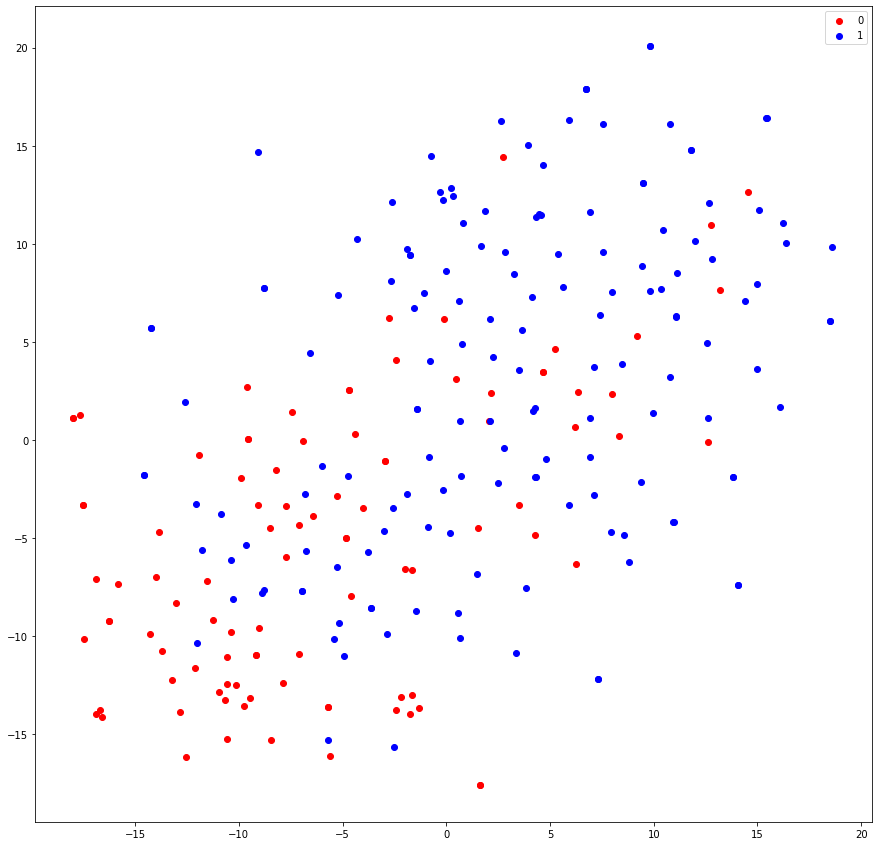

In [118]:
plt.figure(figsize=(15,15))

for i, c, label in zip(y_ids, colors, np.unique(labels)):
    plt.scatter(plot[labels == i, 0], plot[labels == i, 1],
                c=c,
                label=label)
plt.legend()
plt.show()

### PCA

In [119]:
from sklearn.decomposition import PCA

In [120]:
pca = PCA(n_components=2)

In [121]:
plot_pca = pca.fit_transform(list_img)

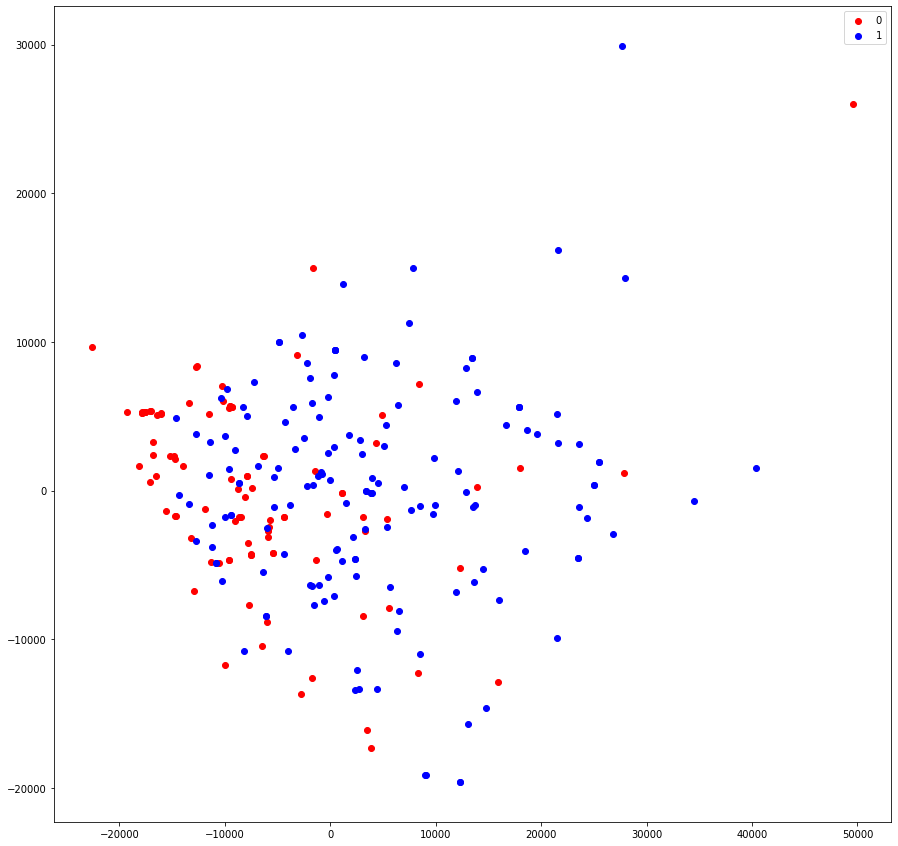

In [122]:
plt.figure(figsize=(15,15))

for i, c, label in zip(y_ids, colors, np.unique(labels)):
    plt.scatter(plot_pca[labels == i, 0], plot_pca[labels == i, 1],
                c=c,
                label=label)
plt.legend()
plt.show()

### KNN

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(list_img, labels, test_size=0.2)

clf = KNeighborsClassifier(n_neighbors=10)

In [126]:
clf.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [127]:
clf.score(xtest, ytest)

0.6862745098039216

In [128]:
scores = []
for k in range(2, 20):
    clf = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest, ytest))

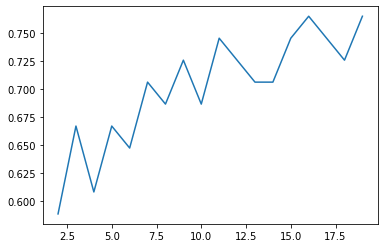

In [129]:
plt.plot(np.arange(2, 20), scores)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

### GradientBoostingClassifier

In [7]:
gbc = GradientBoostingClassifier(n_estimators=50, verbose=2)
gbc.fit(xtrain, ytrain)
gbc.score(xtest, ytest)

      Iter       Train Loss   Remaining Time 
         1           1.3349           55.60m
         2           1.2898           52.52m
         3           1.2477           50.27m
         4           1.2072           48.83m
         5           1.1739           47.56m
         6           1.1398           46.34m
         7           1.1110           45.16m
         8           1.0845           44.05m
         9           1.0605           42.98m
        10           1.0370           41.90m
        11           1.0102           40.80m
        12           0.9815           39.79m
        13           0.9584           38.14m
        14           0.9418           36.63m
        15           0.9243           35.17m
        16           0.9030           33.78m
        17           0.8812           32.46m
        18           0.8628           31.20m
        19           0.8440           29.98m
        20           0.8315           28.81m
        21           0.8140           27.66m
        2

0.8239795918367347

### RandomForestClassifier

In [8]:
rfc = RandomForestClassifier(n_estimators=50, verbose=2)
rfc.fit(xtrain, ytrain)
         5           1.1739           47.56m
         6           1.1398           46.34m
rfc.score(xtest, ytest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


0.8724489795918368

###  SVM

In [9]:
from sklearn.svm import SVC

In [10]:
sv = SVC()
sv.fit(xtrain, ytrain)
sv.score(xtest, ytest)

0.8367346938775511